# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [2]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
df_m = df.groupby('prestige')
print df_m.admit.value_counts()

prestige  admit
1.0       1        33
          0        28
2.0       0        95
          1        53
3.0       0        93
          1        28
4.0       0        55
          1        12
Name: admit, dtype: int64


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [4]:
dummy_df = pd.get_dummies(df, columns=['prestige'], prefix='prestige', drop_first=True)
dummy_df.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3; we can drop 1.0

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [5]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_df.ix[:, 'prestige_2.0':])
handCalc.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,1,0
1,1,660.0,3.67,0,1,0
2,1,800.0,4.00,0,0,0
3,1,640.0,3.19,0,0,1
4,0,520.0,2.93,0,0,1


In [6]:
# crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
df_ct = pd.crosstab(df.admit, df.prestige)
df_ct

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [7]:
p = df_ct[1][1] / float(df_ct[1].sum())
odds_p = (p/(1-p))
print odds_p

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [8]:
p_not_attend = df_ct.T[2:][1].sum() / float(df_ct.T[2:][0].sum() + df_ct.T[2:][1].sum())
odds_p_not_attend = p_not_attend/(1-p)
print odds_p_not_attend

0.60299744898


#### 3.3 Calculate the odds ratio

In [9]:
print odds_p/odds_p_not_attend

1.95452141724


#### 3.4 Write this finding in a sentenance: 

Answer: You're almost twice as likely to be admitted to grad school if you went to a school prestige = 1 vs other schools

#### 3.5 Print the cross tab for prestige_4

In [10]:
print df_ct[2.0]

admit
0    95
1    53
Name: 2.0, dtype: int64


#### 3.6 Calculate the OR 

In [11]:
# OR vs what? OR Prestige 1 vs Prestige 4
odds_p4 = df_ct[4][1] / float(df_ct[4].sum())
print 'odds of Prestige=4: {}'.format(odds_p4)
print odds_p/odds_p4

odds of Prestige=4: 0.179104477612
6.58035714286


#### 3.7 Write this finding in a sentence

Answer: For every person from a prestige=4 undergrad admitted to grad school, 6.6 people from prestige=1 schools are admitted to grad school

## Part 4. Analysis

In [12]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_df.ix[:, 'prestige_2.0':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [13]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [14]:
train_cols = data.columns[1:]

#### 4.2 Fit the model

In [15]:
logit = sm.formula.Logit(data['admit'], data[train_cols])
res = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Feb 2017   Pseudo R-squ.:                 0.08166
Time:                        15:14:41   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [17]:
# confidence intervals
res.conf_int()

,0,1
gre,0.000074,0.004362
gpa,0.127619,1.431056
prestige_2.0,-1.301337,-0.058936
prestige_3.0,-2.014579,-0.662776
prestige_4.0,-2.371624,-0.735197
intercept,-6.116077,-1.637631


In [18]:
# params = coefficients
odds = np.exp(res.params)

print odds

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


#### 4.5 Interpret the OR of Prestige_2

Answer: You're half as likely to be admitted to grad school if you went to a prestige=2 school than a prestige=1 school

#### 4.6 Interpret the OR of GPA

Answer: For every 1 point increase in GPA, your odds of being admitted to grad school more than double.

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [19]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [20]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]), columns=['gre', 'gpa', 'prestige', 'admit'])

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [21]:
# recreate the dummy variables
# keep only what we need for making predictions
dummy_combos = pd.get_dummies(combos, columns=['prestige'], drop_first=True, prefix='prestige')
dummy_combos.head()
dummy_combos['intercept'] = 1.0

#### 5.2 Make predictions on the enumerated dataset

In [22]:
combos['predictions'] = res.predict(dummy_combos[train_cols])

In [23]:
dummy_combos.tail()

,gre,gpa,admit,prestige_2.0,prestige_3.0,prestige_4.0,intercept
395,800.0,3.806667,1.0,0,0,1,1.0
396,800.0,4.000000,1.0,0,0,0,1.0
397,800.0,4.000000,1.0,1,0,0,1.0
398,800.0,4.000000,1.0,0,1,0,1.0
399,800.0,4.000000,1.0,0,0,1,1.0


#### 5.3 Interpret findings for the last 4 observations

Answer: The model predicts that someone from prestige=1 school will be admitted nearly twice as often as someone from a prestige=4 school, holding all else fixed--prestige is a very large determiner of admission.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [24]:
import seaborn as sns

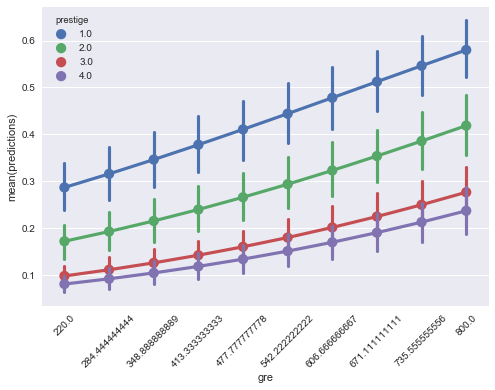

In [25]:
chart1 = sns.pointplot(data=combos, x='gre', y='predictions', hue='prestige')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45);

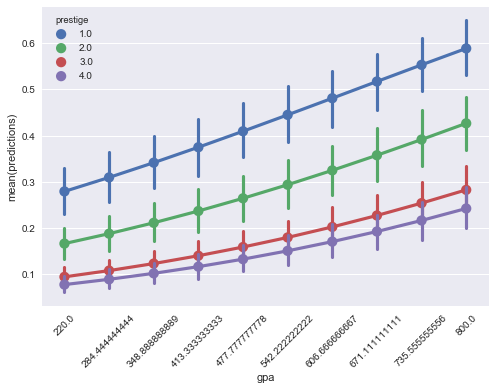

In [26]:
chart2 = sns.pointplot(data=combos, x='gpa', y='predictions', hue='prestige')
chart2.set_xticklabels(chart1.get_xticklabels(), rotation=45);